# Linear Regression Implementation

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('darkgrid')

In [8]:
# Create a toy dataset 
house_prices = np.array([500, 550, 650, 800, 825])
rooms = np.array([1, 1, 2, 2, 2])
baths = np.array([1, 2, 1, 3, 2])

X = np.c_[rooms, baths]
y = house_prices

**Ordinary Least Squares (OLS) aka Linear Least Squares:**
$$
J(w)=\frac{1}{2}\sum_{i=1}^{n}\,(y^{(i)}-\hat{y}^{(i)})^2
$$
$$
\hat{y}=w^Tx
$$

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20, tol=0.001):
        self.eta = eta
        self.n_iter = n_iter
        self.tol = tol
        
    def fit(self, X, y):
        # Initialize weights at 0
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            if len(self.cost_) > 1:
                if (self.cost_[-1] - cost) <= self.tol:
                    break 
            self.cost_.append(cost)    
            self.intercept_ = self.w_[0]
            self.n_iter_ = i + 1
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)
    
    def score(self, y_true, y_pred, metric='r2'):
        if metric == 'mse':
            return mean_squared_error(y_true, y_pred, squared=True)
        elif metric == 'rmse':
            return mean_squared_error(y_true, y_pred, squared=False)
        return r2_score(y_true, y_pred)

In [42]:
test_rooms = np.array([1, 2, 1, 3, 3])
test_baths = np.array([2, 2, 3, 1, 2])

X_test = np.c_[test_rooms, test_baths]
y_test = np.array([525, 600, 625, 500, 800])

In [43]:
lr = LinearRegressionGD(n_iter=100)
lr.fit(X, y)

In [44]:
y_pred = lr.predict(X_test)

In [45]:
y_pred

array([572.46232698, 730.30158942, 732.5460798 , 728.05709903,
       888.14085185])

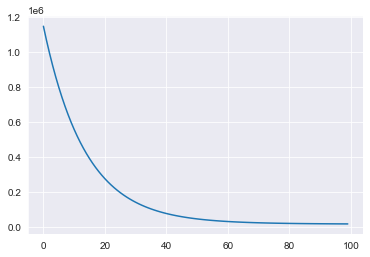

In [46]:
plt.plot(lr.cost_)

In [48]:
lr.score(y_test, y_pred)

-0.6246849533935579

In [50]:
eta = [0.001, 0.001, 0.01, 0.1, 1.0]
tol = [0.001, 0.001, 0.01, 0.1, 1.0]
n_iter = [50, 100, 150, 200, 300]

scores = []
params = []
for e in eta:
    for t in tol:
        for i in n_iter:
            clf = LinearRegressionGD(eta=e, tol=t, n_iter=i)
            clf.fit(X_test, y)
            y_pred = clf.predict(X_test)
            scores.append(clf.score(y, y_pred))
            params.append({'eta': e, 'tol': t, 'n_iter': i})
            
best_idx = scores.index(max(scores))
print('Best parameters:', params[best_idx])
print('Best score:', scores[best_idx])

Best parameters: {'eta': 0.01, 'tol': 0.001, 'n_iter': 300}
Best score: 0.751880753558969


# Using the Normal Equation

$$\theta = (X^T X)^{-1}X^Ty$$

In [565]:
df_new = df['baths']
X = np.ones((5, 2))
X[:,1:] = df_new.values.reshape(-1, 1)
X_trans = X.T
theta = np.linalg.inv(X_trans.dot(X)).dot(X_trans).dot(y)
print(theta)

[462.5 112.5]


[ 350. 1025.]


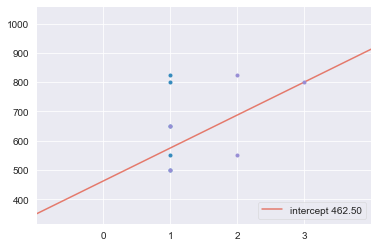

In [593]:
# test prediction  
test_X = np.array([[-1], [5]])  
test_X_b = np.c_[np.ones((2, 1)), test_X]  
prediction = test_X_b.dot(theta)
print(prediction)

plt.plot(test_X, prediction, alpha=0.7, label='intercept {:.2f}'.format(theta[0]))  
plt.plot(X, y, marker='.', linestyle='')
plt.legend(loc='lower right')
plt.xticks([0, 1, 2, 3])
plt.xlim(-1, 4)
plt.show() 